In [91]:
import json
data = 0
with open('C:\\Users\\mechadmin\\Desktop\\reseach\\cp_w_epoch_20000.json') as f:
    data = json.load(f)


In [67]:
import json
data1 = 0
with open('C:\\Users\\mechadmin\\Desktop\\superformula_dataset\\cp_w_epoch_20000.json') as f:
    data1 = json.load(f)


In [69]:
data1.keys()

dict_keys(['cp', 'w'])

In [99]:
import numpy as np
cpts = np.array(data['cp'][10])
weights = np.array(data['w'][10])

In [43]:
cpts.shape

(1200, 64, 2)

In [38]:
weights.shape

(64, 1)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(64,)
<KnotVector p=3 sz=68>
(64, 2)
(64,)
(64,)


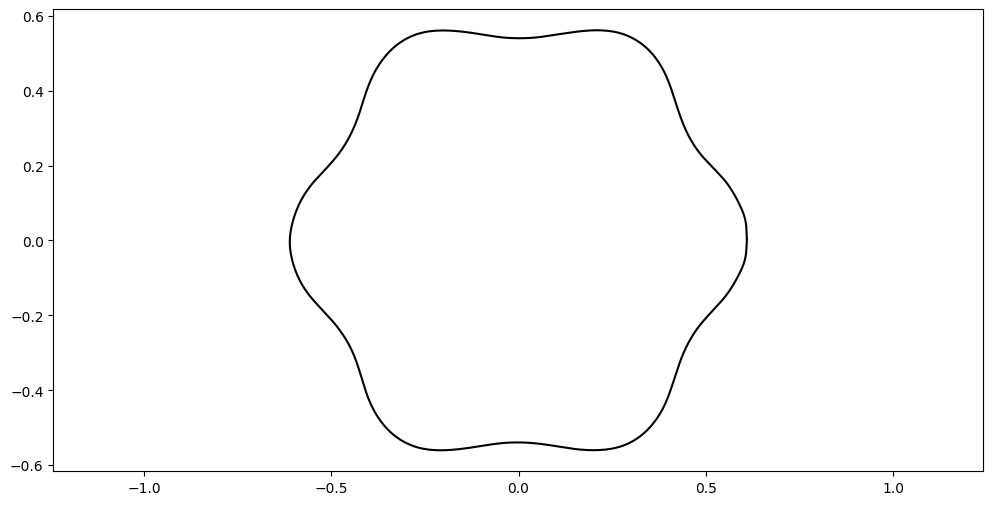

In [100]:
from pyiga.geometry import *
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
from pyiga import approx, bspline
n_kv = 61
kv = bspline.make_knots(3, 0.0, 1.0, n_kv)
degree = 3
num = cpts.shape[1]
knots = [0] * (degree + 1) + [i / (num - degree) for i in range(1, num - degree)] + [1] * (degree + 1)
coeff = cpts
grid = (np.linspace(0.0, 1.0, 100),)
# weights = np.random.random(coeff.shape[0])*5
# weights = np.ones(coeff.shape[0])
N = tuple(kv.numdofs for kv in (kv,))
print(N)
print(kv)
print(coeff.shape)
print(weights.squeeze().shape)
nurbs = NurbsFunc((kv,), coeff.copy(), weights=weights.squeeze())
vals = nurbs.grid_eval(grid)

vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
axis('equal');


(101,)
(64, 101)


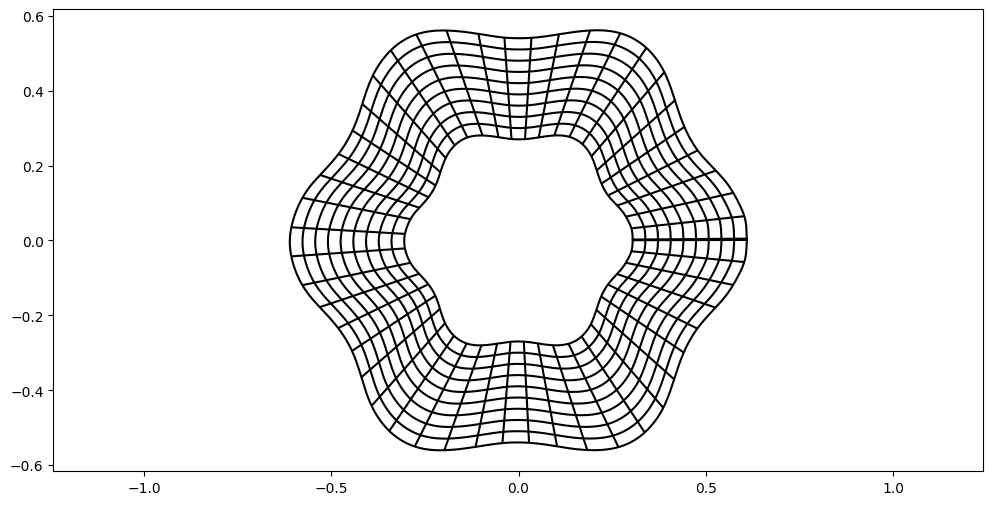

In [94]:
g = geometry.line_segment([0.5,0.5], [1,1], intervals=100)
geo = geometry.outer_product(nurbs, g)
grid = (np.linspace(0.0, 1.0, 8),)
vis.plot_geo(geo, gridx = 50, gridy = 10, grid = grid, res = 400)
axis('equal');

grid eval from bspline function is used
grid eval from bspline function is used
grid eval from bspline function is used


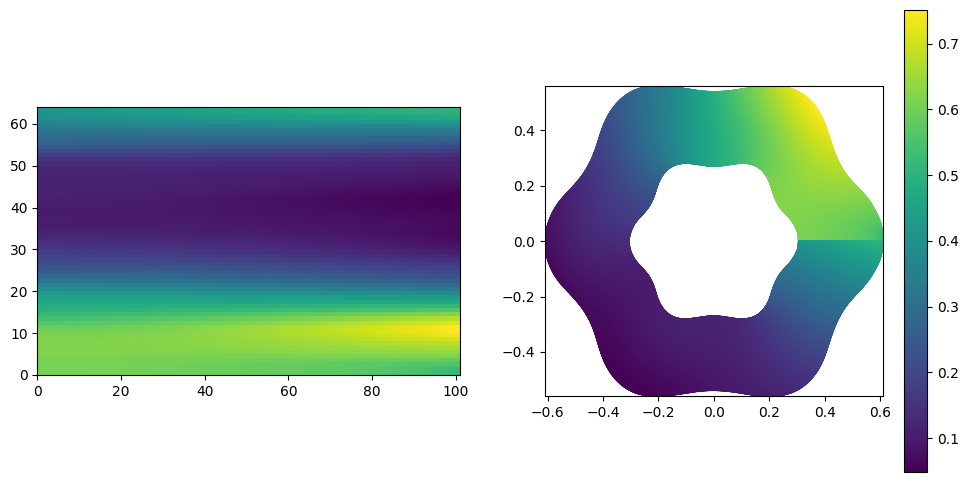

In [101]:
g = lambda x,y: np.exp(-(x-.8)**2 - (y-.8)**2)  # Dirichlet BC function
f = lambda x,y: 3 * np.sin(10*x) * np.cos(10*y) # source term
kvs = geo.kvs
# compute Dirichlet boundary conditions
bcs = assemble.compute_dirichlet_bcs(kvs, geo, [('right', g), ('top', g)])

# compute right-hand side from function f
rhs = assemble.inner_products(kvs, f, f_physical=True, geo=geo).ravel()
# set up and solve linear system
A = assemble.stiffness(kvs, geo)
LS = assemble.RestrictedLinearSystem(A, rhs, bcs)

u = scipy.sparse.linalg.spsolve(LS.A, LS.b)
u_func = geometry.BSplineFunc(kvs, LS.complete(u))
# plot coefficients and solution
figsize(12,6)

subplot(1,2,1)
pcolormesh(u_func.coeffs)
gca().set_aspect('equal')

subplot(1,2,2)
vis.plot_field(u_func, geo, res = 500)
gca().set_aspect('equal')
colorbar();

grid eval from bspline function is used
grid eval from bspline function is used
grid eval from bspline function is used


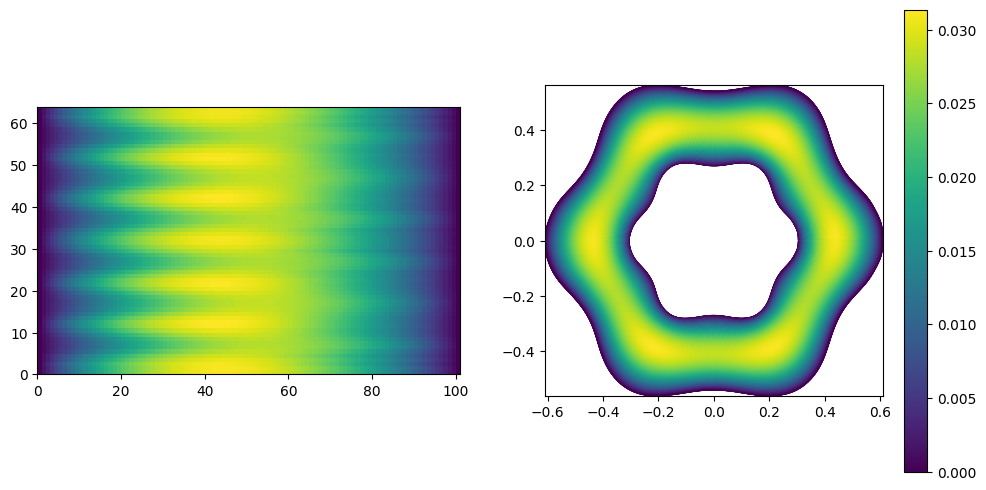

In [102]:
g = lambda x,y: 0  # Dirichlet BC function
f = lambda x,y: 3 # source term

# compute Dirichlet boundary conditions
bcs = assemble.compute_dirichlet_bcs(kvs, geo, [('left', g), ('right', g)])

# compute right-hand side from function f
rhs = assemble.inner_products(kvs, f, f_physical=True, geo=geo).ravel()
# set up and solve linear system
A = assemble.stiffness(kvs, geo)
LS = assemble.RestrictedLinearSystem(A, rhs, bcs)

u = scipy.sparse.linalg.spsolve(LS.A, LS.b)
u_func = geometry.BSplineFunc(kvs, LS.complete(u))
# plot coefficients and solution
figsize(12,6)

subplot(1,2,1)
pcolormesh(u_func.coeffs)
gca().set_aspect('equal')

subplot(1,2,2)
vis.plot_field(u_func, geo, res = 500)
gca().set_aspect('equal')
colorbar();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(64,)
<KnotVector p=3 sz=68>
(64, 2)
(64,)
(64,)


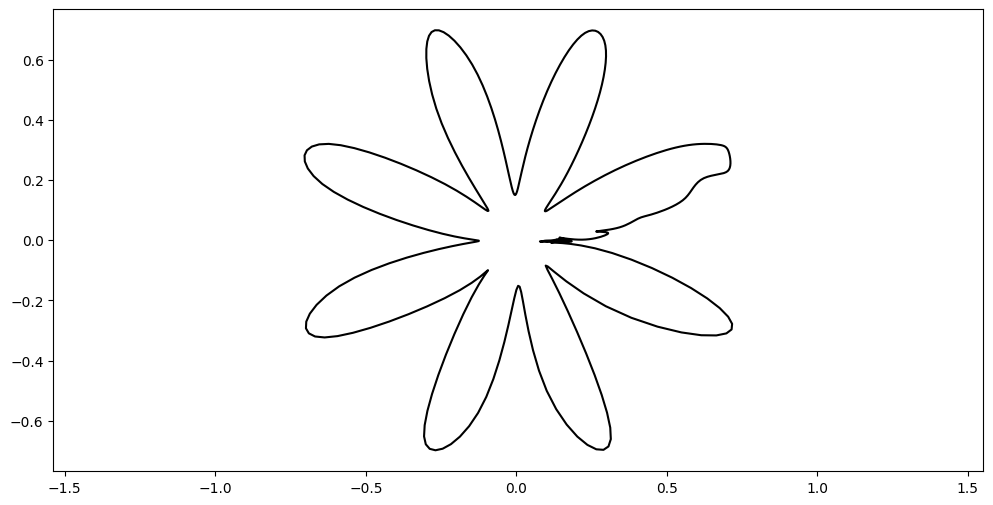

In [90]:
from pyiga.geometry import *
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
from pyiga import approx, bspline
cpts = np.array(data1['cp'][500])
weights = np.array(data1['w'][500])
n_kv = 61
kv = bspline.make_knots(3, 0.0, 1.0, n_kv)
degree = 3
num = cpts.shape[1]
knots = [0] * (degree + 1) + [i / (num - degree) for i in range(1, num - degree)] + [1] * (degree + 1)
coeff = cpts
grid = (np.linspace(0.0, 1.0, 100),)
# weights = np.random.random(coeff.shape[0])*5
# weights = np.ones(coeff.shape[0])
N = tuple(kv.numdofs for kv in (kv,))
print(N)
print(kv)
print(coeff.shape)
print(weights.squeeze().shape)
nurbs = NurbsFunc((kv,), coeff.copy(), weights=weights.squeeze())
vals = nurbs.grid_eval(grid)

vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
axis('equal');


In [71]:
cpts[0]

[[0.3294066786766052, -0.0012564400676637888],
 [0.20595009624958038, -0.004311207216233015],
 [0.147416889667511, -0.004049774259328842],
 [0.11281713843345642, -0.005730775184929371],
 [0.09116032719612122, -0.005539773963391781],
 [0.07957815378904343, -0.0054481904953718185],
 [0.0728420689702034, -0.005709669552743435],
 [0.0733080580830574, -0.004792491905391216],
 [0.0763372927904129, -0.004435340873897076],
 [0.08821343630552292, -0.0031466749496757984],
 [0.10538659244775772, -0.0012929907534271479],
 [0.13704971969127655, 0.001546157174743712],
 [0.19234922528266907, 0.007730971556156874],
 [0.3337211012840271, 0.02818365767598152],
 [0.3343016505241394, 0.016950663179159164],
 [0.28862446546554565, 0.018923016265034676],
 [0.2928854823112488, 0.023351190611720085],
 [0.334565669298172, 0.04669233784079552],
 [0.32644471526145935, 0.040612321346998215],
 [0.32581716775894165, 0.058663856238126755],
 [0.31024202704429626, 0.0760936439037323],
 [0.31167373061180115, 0.080231882

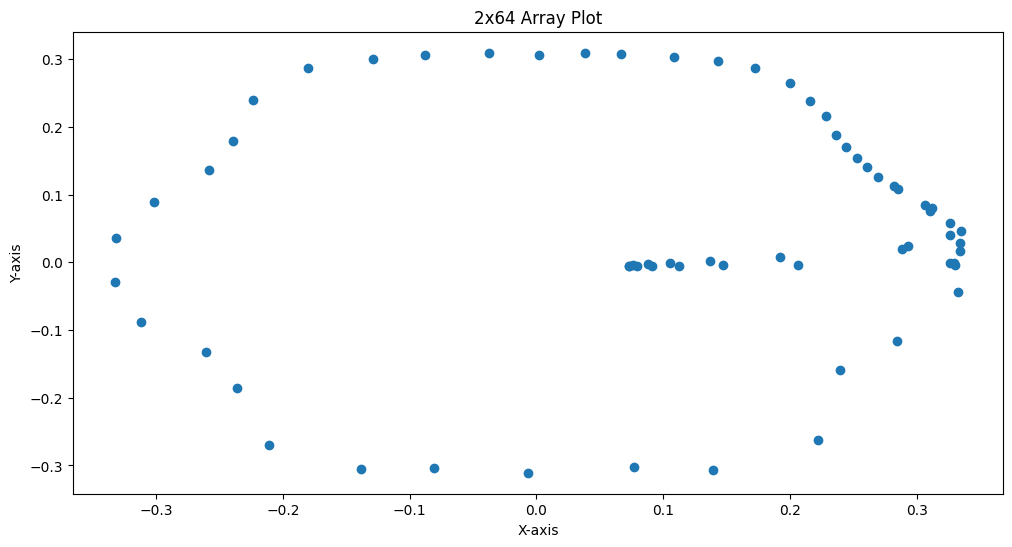

In [72]:
import numpy as np
import matplotlib.pyplot as plt
cpt = np.array(cpts[0])
weight = np.array(weights[10])

# Plot the data
plt.scatter(cpt[:,0], cpt[:,1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x64 Array Plot')

# Show the plot
plt.show()

In [73]:
last_10_keys = list(data.keys())[-100:]
print(last_10_keys)

['cp', 'w', 'ub', 'dp']


In [74]:
for i in range(len(cpts)):
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    # cpts = parse_str(cp)
    # weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)       

KeyError: 0

In [ ]:
for i in last_10_keys:
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    cpts = parse_str(cp)
    weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)                                     
    

In [12]:
import itertools

def gen_grid(d, points_per_axis, lb=0., rb=1.):
    ''' Generate a grid in a d-dimensional space 
        within the range [lb, rb] for each axis '''
    
    lincoords = []
    for i in range(0, d):
        lincoords.append(np.linspace(lb, rb, points_per_axis))
    coords = list(itertools.product(*lincoords))
    
    return np.array(coords)
X = cpt
Z = None
scale = 0.8
points_per_axis = None
if Z is None or Z.shape[1] != 2 or points_per_axis is None:
    N = X.shape[0]
    points_per_axis = int(N**.5)
    bounds = (0., 3.)
    Z = gen_grid(2, points_per_axis, bounds[0], bounds[1]) # Generate a grid
    
scale /= points_per_axis*1.3
z = 0
for (i, z) in enumerate(Z):
        z =z

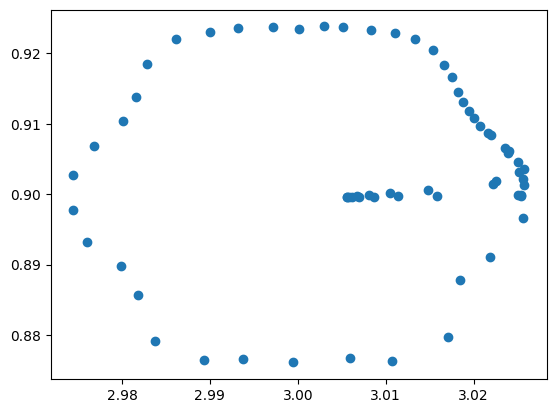

In [13]:
xys = cpt
xscl = scale
yscl = scale
z1 = z[0]
z2 = .3*z[1]
max_distance = 0.3
scaled_coords = [(x * xscl + z1, y * yscl + z2) for (x, y) in xys]
segments = []
segment = [scaled_coords[0]]
for i in range(1, len(scaled_coords)):
    dist = np.sqrt((scaled_coords[i][0] - segment[-1][0]) ** 2 +
                    (scaled_coords[i][1] - segment[-1][1]) ** 2)
    if dist <= max_distance:
        segment.append(scaled_coords[i])
    else:
        segments.append(segment)
        segment = [scaled_coords[i]]
segments.append(segment)
scaled_coords = np.array(scaled_coords)
plt.scatter(scaled_coords[:,0] ,scaled_coords[:,1])


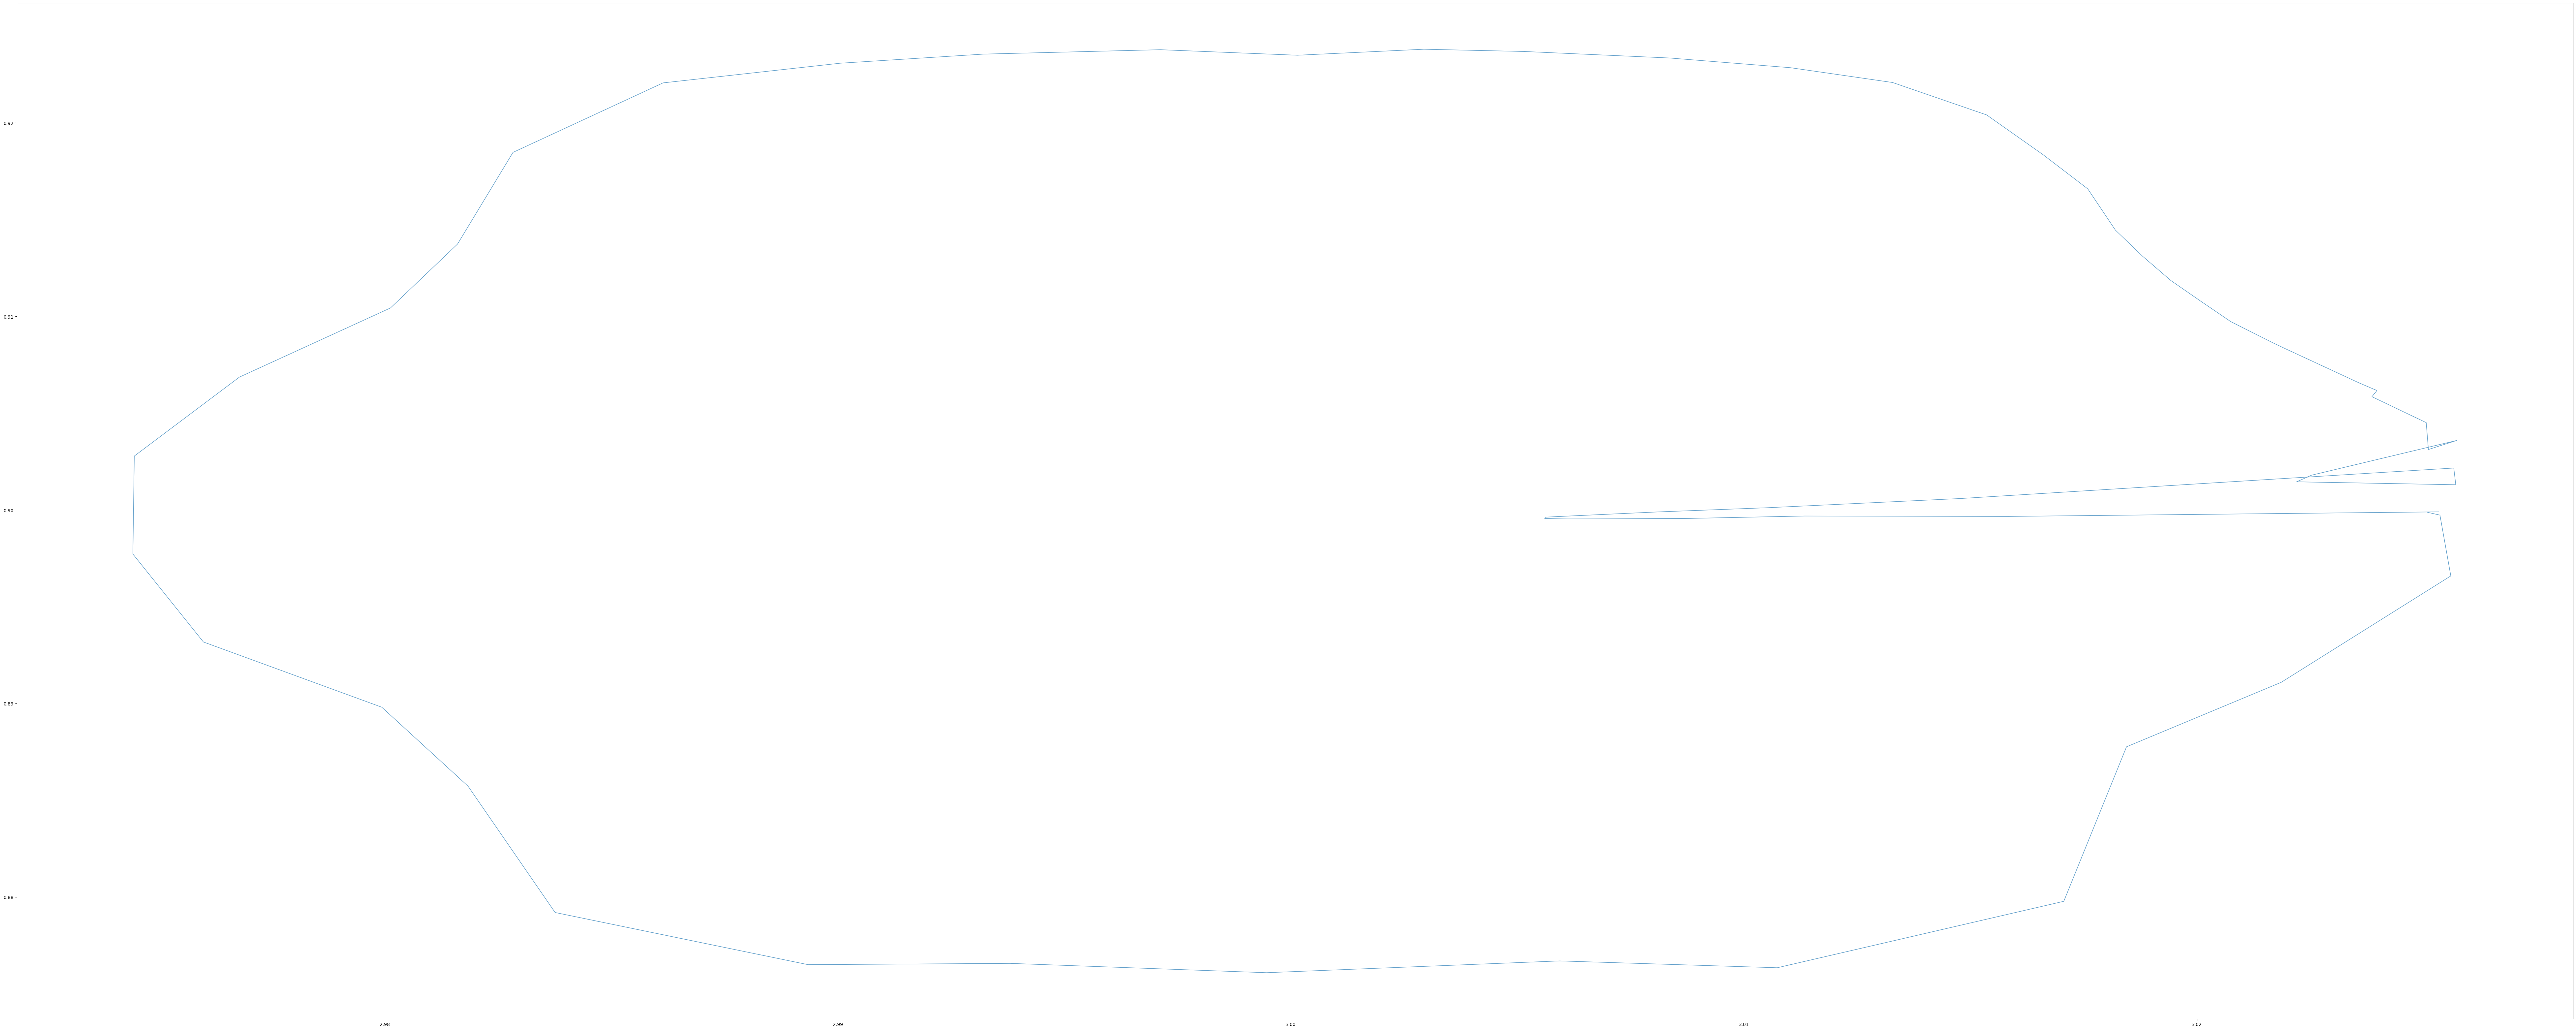

In [9]:
fig = plt.figure(figsize=(100, 40))
ax = fig.add_subplot(111)
for segment in segments:
    ax.plot(*zip(*segment),lw=1.2, alpha=.7)
segments = np.array(segments[0])

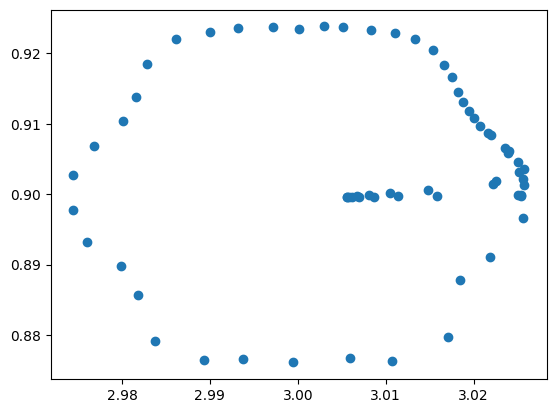